<a href="https://colab.research.google.com/github/victormazevedo/predict-financial-fraud/blob/master/Predict_Financial_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Financial Fraud with Data Science Analysis

![alt text](http://www.fatecrp.edu.br/wp-content/themes/fatecrp/dist/img/logo.png)

This is a final-project destinated to Analise e Densenvolvimento de Sistema's course of Fatec Ribeirão Preto

O seguinte projeto é destinado ao trabalho de conclusão de curso do curso de Análise e Desenvolvimento de Sistemas da Fatec Ribeirão Preto. O tema deste projeto é Detecção Automática de Fraude Financeira utilizando Data Science.

Para isto, utilizarei um [dataset](https://www.kaggle.com/ntnu-testimon/paysim1) presente no site [Kaggle](https://kaggle.com).
Este dataset simula transações realizadas via mobile com base em uma amostra de um mês inteiro, disponibilizado por um grande serviço de banco digital da África. Este mesmo serviço também existe em 14 países.
O dataset disponibilizado no Kaggle representa 1/4 do dataset original.

# Breve descrição do Dataset

* step - mapeia a unidade de tempo no mundo real.

* type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* amount - total da transação na moeda local.

* nameOrig - cliente que começou a transação.

* oldbalanceOrg - saldo inicial antes da transação.

* newbalanceOrig - saldo final depois da transação.

* nameDest - cliente que recebeu a transação (destinatário/favorecido).

* oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

* newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

* isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

* isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

## Import do dataset



In [0]:
#importando algumas libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from random import seed,sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc,\
precision_score
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [0]:
#importando dados do DropBox
pd.set_option('display.max_columns', 20)
!wget 'https://www.dropbox.com/s/2f2ex1g5gvug9rg/PS_20174392719_1491204439457_log.csv?dl=0'
df = pd.read_csv('PS_20174392719_1491204439457_log.csv?dl=0')

--2020-05-16 18:42:47--  https://www.dropbox.com/s/2f2ex1g5gvug9rg/PS_20174392719_1491204439457_log.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2f2ex1g5gvug9rg/PS_20174392719_1491204439457_log.csv [following]
--2020-05-16 18:42:48--  https://www.dropbox.com/s/raw/2f2ex1g5gvug9rg/PS_20174392719_1491204439457_log.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc36fe18b3655d7839d2530e5b4c.dl.dropboxusercontent.com/cd/0/inline/A33aOx7zmqYQs7ic7ufBRdXNsqrf8T2a8XUjHi1FEGpWLSW7GIoJDYCpiLJewcecOHsBXEM2xNHmZ92dVDGktEXw3jPMUJMYlC_9JzmSpluEKO1RJu07n5YvN5B1TOG63gw/file# [following]
--2020-05-16 18:42:48--  https://uc36fe18b3655d7839d2530e5b4c.dl.dropboxusercontent.com/cd/0/inline/A33aOx7zmqYQs7ic7ufBRdXNsqrf8T2a8XUjH

# Resumo dos dados

In [0]:
  df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [0]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [0]:
df.shape

(6362620, 11)

### Explicando cada coluna e seus dados

Ao executar o _info_, conseguimos visualizar

In [0]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [0]:
# renomeando oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', 'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})
df.head(1)

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0


In [0]:
# verificando se existem valores nulos no dataset
df.isna().values.any()
df.isna().sum(0).sort_values(ascending = False)

isFlaggedFraud    0
isFraud           0
newBalanceDest    0
oldBalanceDest    0
nameDest          0
newBalanceOrig    0
oldBalanceOrig    0
nameOrig          0
amount            0
type              0
step              0
dtype: int64

### Categorizando os tipos de contas
- Aqui farei uma categorização de quem para quem foi a trasação. Por exemplo:
CC (Customer to Customer), CM (Customer to Merchant), MC (Merchant to Customer), MM (Merchant to Merchant)

In [0]:
# realiza uma cópia do dataframe
newDf = df.copy()
newDf["accountTransactionType"] = np.nan
newDf.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('C'), "accountTransactionType"] = "CC"
newDf.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('M'), "accountTransactionType"] = "CM"
newDf.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('C'), "accountTransactionType"] = "MC"
newDf.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('M'), "accountTransactionType"] = "MM"

In [0]:
fraud = newDf[newDf["isFraud"] == 1]
genuine = newDf[newDf["isFraud"] == 0]

In [0]:
# número de transações fraudulentas e genuínas por accountTransactionType
print(f"Número de transações fraudulentas: \n {fraud.accountTransactionType.value_counts()}")
print(f"Número de transações genuínas: \n {genuine.accountTransactionType.value_counts()}")

Número de transações fraudulentas: 
 CC    8213
Name: accountTransactionType, dtype: int64
Número de transações genuínas: 
 CC    4202912
CM    2151495
Name: accountTransactionType, dtype: int64


Com a análise acima, percebe-se um certo padrão de que as transações fraudulentas são feitas apenas em transações 'Customer to Customer'.
Já que não precisaremos mais desta colunas, as eliminarei

In [0]:
fraud = fraud.drop("accountTransactionType", 1)
genuine = genuine.drop("accountTransactionType", 1)
newDf = newDf.drop("accountTransactionType", 1)

### Tipos de transações

In [0]:
print(f"Tipos de transações fraudulentas: \n{fraud.type.value_counts()}")
print(f"Tipos de transações genuínas: \n{genuine.type.value_counts()}")

Tipos de transações fraudulentas: 
CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64
Tipos de transações genuínas: 
CASH_OUT    2233384
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     528812
DEBIT         41432
Name: type, dtype: int64


Com a análise acima, percebemos que, incluíndo que as transaçoes fraudulentas são de Customer pra Customer, os tipos de transações presentes entre elas é de CASH_OUT e TRANSFER.

Das 8213 transações fraudulentas CC, 4116 são CASH_OUT e 4097 TRANSFER.

In [0]:
# alterando os dataframes para conter apenas transações do tipo CASH_OUT e TRANSFER
genuine = genuine[(genuine["type"] == "CASH_OUT") | (genuine["type"] == "TRANSFER")]
newDf = newDf[(newDf["type"] == "CASH_OUT") | (newDf["type"] == "TRANSFER")]

### Saldo antes e depois da transação

In [0]:
wrongOrigBalance = sum(df.oldBalanceOrig - df.amount != df.newBalanceOrig)
wrongDestBalance = sum(df.newBalanceDest + df.amount != df.newBalanceDest)
print(f"Porcentagem de saldos errados para pessoas que fizeram a transação: {100*round(wrongOrigBalance/len(df),2)}")
print(f"Porcentagem de saldos errados para pessoas que receberam a transação: {100*round(wrongDestBalance/len(df),2)}")

Porcentagem de saldos errados para pessoas que fizeram a transação: 85.0
Porcentagem de saldos errados para pessoas que receberam a transação: 100.0


Com o trecho acima, claramente vemos que não conseguimos estimar muito bem o que acontece tanto nas contas que trasnferem quanto nas contas que recebem dinheiro.

In [0]:
numberOfWrongBalance = (df["oldBalanceOrig"] - df["amount"] != df["newBalanceOrig"]) | (df["newBalanceDest"] + df["amount"] != df["newBalanceDest"])
print(f"Percentual de transações com o saldo errado: {100*round(sum(numberOfWrongBalance)/len(df),2)}")

Percentual de transações com o saldo errado: 100.0


Com a análise feita acima, percebemos que todos os dados deste dataset apresentam um erro no saldo. Não sei o porque. Para manter a integridade, criarei duas novas colunas no dataset: _errorBalanceOrig_ e _errorBalanceDest_.

In [0]:
newDf["errorBalanceOrig"] = newDf.newBalanceOrig + newDf.amount - newDf.oldBalanceOrig
newDf["errorBalanceDest"] = newDf.oldBalanceDest + newDf.amount - newDf.newBalanceDest

#inserindo dados no fraud e genuine
fraud = newDf[newDf["isFraud"] == 1]
genuine = newDf[newDf["isFraud"] == 0]

In [0]:
print("Summary statistics of errorBalanceOrg for fraudulent transactions: \n",fraud["errorBalanceOrig"].describe())
print("\n Summary statistics of errorBalanceOrg for valid transactions: \n",genuine["errorBalanceOrig"].describe())

Summary statistics of errorBalanceOrg for fraudulent transactions: 
 count    8.213000e+03
mean     1.069233e+04
std      2.651461e+05
min     -7.450581e-09
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+07
Name: errorBalanceOrig, dtype: float64

 Summary statistics of errorBalanceOrg for valid transactions: 
 count    2.762196e+06
mean     2.868035e+05
std      8.763752e+05
min     -1.000000e-02
25%      5.261343e+04
50%      1.442008e+05
75%      2.804663e+05
max      9.244552e+07
Name: errorBalanceOrig, dtype: float64


## O que determina uma transação ser marcada como _isFlaggedFraud_?

In [0]:
countIsFlaggedFraud = df.loc[(df.isFlaggedFraud == 1)]
print("O número de transações marcadas como isFlaggedFraud é: {} ".format(len(countIsFlaggedFraud)))

print("O tipo de transações que estão flagadas com isFlaggedFraud é: {}".format(list(df.loc[df.isFlaggedFraud == 1].type.drop_duplicates())))

dfTransfer = df.loc[df.type == 'TRANSFER']
dfFlagged = df.loc[df.isFlaggedFraud == 1]
dfNotFlagged = df.loc[df.isFlaggedFraud == 0]

print('\nValor minimo transacionado quando a flag esta ativa: ${}'.format(dfFlagged.amount.min()))
print('\nValor maximo quando a flag estava inativa: ${}'.format(dfNotFlagged.amount.max()))

O número de transações marcadas como isFlaggedFraud é: 16 
O tipo de transações que estão flagadas com isFlaggedFraud é: ['TRANSFER']

Valor minimo transacionado quando a flag esta ativa: $353874.22

Valor maximo quando a flag estava inativa: $92445516.64


In [0]:
print('\nThe number of TRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest = 0 and\
 newBalanceDest = 0: {}'.\
format(len(dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & \
(dfTransfer.oldBalanceDest == 0) & (dfTransfer.newBalanceDest == 0)])))


The number of TRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest = 0 and newBalanceDest = 0: 4158


In [0]:
print(f'\nMin e Max da oldBalanceOrig pra flaggedFraud = 1 TRANSFERS {round(dfFlagged.oldBalanceOrig.min()), round(dfFlagged.oldBalanceOrig.max())}')

dfTransferEqualBalance = dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & (dfTransfer.oldBalanceOrig == dfTransfer.newBalanceOrig)]
print(f'\nMin e Max da oldBalanceOrig pra flaggedFraud = 0 pra quando oldBalanceOrig \
for igual a newBalanceOrig {round(dfTransferEqualBalance.oldBalanceOrig.min()), round(dfTransferEqualBalance.oldBalanceOrig.max())}')


Min e Max da oldBalanceOrig pra flaggedFraud = 1 TRANSFERS (353874, 19585040)

Min e Max da oldBalanceOrig pra flaggedFraud = 0 pra quando oldBalanceOrig for igual a newBalanceOrig (0, 575668)


## Há contas marcadas normais para TRANSFERs e CASH_OUTs fraudulentos?

Pela descrição do dataset, as fraudes acontecem primeiro com uma TRANSFER para uma conta fraudulenta, e esta conta ao receber o dinheiro realiza uma operaçãão de CASH_OUT. CASH_OUT envolve transacionar com um comerciante que paga em dinheiro. Contudo, com este comportamento citado acima, a conta fraudulenta pode ser ambas, o destino em uma TRANSFER e quem deu origem ao CASH_OUT.

In [0]:
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]
print(f'Há contas que foram o destino da TRANSFER que também gerou a CASH_OUT? \
{dfFraudTransfer.nameDest.isin(dfFraudCashout.nameOrig).any()}')

Há contas que foram o destino da TRANSFER que também gerou a CASH_OUT? False


In [0]:
dfNotFraud = df.loc[(df.isFraud == 0)]
print('\nTRANSFERs fraudulentas no qual a conta de destino era geradora genuina de CASH_OUTs\
: \n\n{}'.format(dfFraudTransfer.loc[dfFraudTransfer.nameDest.\
isin(dfNotFraud.loc[dfNotFraud.type == 'CASH_OUT'].nameOrig.drop_duplicates())]))


TRANSFERs fraudulentas no qual a conta de destino era geradora genuina de CASH_OUTs: 

         step      type      amount     nameOrig  oldBalanceOrig  \
1030443    65  TRANSFER  1282971.57  C1175896731      1282971.57   
6039814   486  TRANSFER   214793.32  C2140495649       214793.32   
6362556   738  TRANSFER   814689.88  C2029041842       814689.88   

         newBalanceOrig     nameDest  oldBalanceDest  newBalanceDest  isFraud  \
1030443             0.0  C1714931087             0.0             0.0        1   
6039814             0.0   C423543548             0.0             0.0        1   
6362556             0.0  C1023330867             0.0             0.0        1   

         isFlaggedFraud  
1030443               0  
6039814               0  
6362556               0  


In [0]:

#numero de transações marcadas como isFraud
countIsFraud = df.loc[(df.isFraud == 1)]
print(f'o número de transações marcadas como isFraud é: {len(countIsFraud)}')

o número de transações marcadas como isFraud é: 8213


In [0]:
#porque temos transações em que não bate o número?
print('Checking if amount - oldBalanceOrig == newBalanceOrig')
dfCheckBalance = df.loc[(df.oldBalanceOrig - df.amount) != df.newBalanceOrig]

Checking if amount - oldBalanceOrig == newBalanceOrig


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


<function matplotlib.pyplot.show>

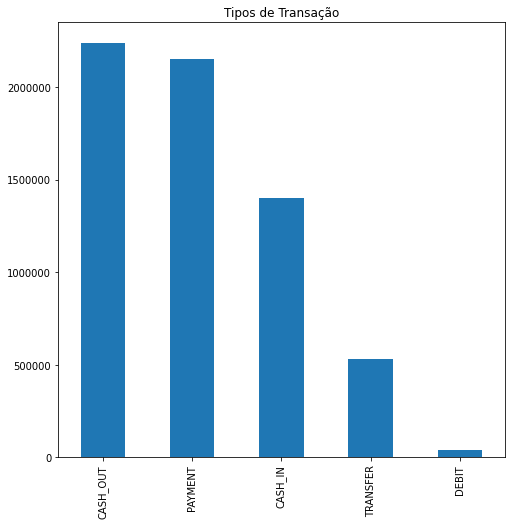

In [0]:
values = df.type.value_counts()
print(values)

fig, ax = plt.subplots(1, 1, figsize = (8, 8))
values.plot(kind='bar', title='Tipos de Transação', ax=ax)
#retirando notação científica
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show

# Limpeza dos dados

Depois de ter realizado a análise de dados acima, percebemos que as fraudes somente acontetem em TRANSFERS e CASH_OUTS. Desta forma reunirei apenas os dados relevantes

In [0]:
# selecionando apenas transfers e cashout
cleanedDf = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
print(cleanedDf.shape)

(2770409, 11)


In [0]:
dummy = cleanedDf['isFraud']
del cleanedDf['isFraud']
print(cleanedDf.shape)

(2770409, 10)


In [0]:
#eliminando colunas irrelevantes
cleanedDf = cleanedDf.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)
print(cleanedDf.shape)

(2770409, 7)


In [0]:
# realizando o binary-encoding dos dados
cleanedDf['type'] = cleanedDf['type'].map({
    'TRANSFER': 0,
    'CASH_OUT': 1
})

In [0]:
cleanedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldBalanceOrig  float64
 4   newBalanceOrig  float64
 5   oldBalanceDest  float64
 6   newBalanceDest  float64
dtypes: float64(5), int64(2)
memory usage: 169.1 MB


## Eliminação de valores ausentes

In [0]:
fraud = cleanedDf.loc[dummy == 1]
nonFraud = cleanedDf.loc[dummy == 0]
percentageOfFraudulent = (len(fraud.loc[(fraud.oldBalanceDest == 0) & \
(fraud.newBalanceDest == 0) & (fraud.amount)]) / (1.0 * len(fraud)))
print(f"\nA porcentagem de transações fraudulentas com \'oldBalanceDest\' = \
\'newBalanceDest\'= 0 embora o \'amount\' não é zero: {percentageOfFraudulent}")


A porcentagem de transações fraudulentas com 'oldBalanceDest' = 'newBalanceDest'= 0 embora o 'amount' não é zero: 0.4955558261293072


In [0]:
percentageNonFraud = (len(nonFraud.loc[(nonFraud.oldBalanceDest == 0) & \
(nonFraud.newBalanceDest == 0) & (nonFraud.amount)]) / (1.0 * len(nonFraud)))
print(f"\nA porcentagem de transações não fraudulentas com \'oldBalanceDest\' = \
\'newBalanceDest\'= 0 embora o \'amount\' não é zero: {percentageNonFraud}")


A porcentagem de transações não fraudulentas com 'oldBalanceDest' = 'newBalanceDest'= 0 embora o 'amount' não é zero: 0.0006176245277308345


Um dos maiores indicadores de transações fraudulentas é o saldo da conta de destino estar zerado, como mostrado acima. Deste modo, para facilitar o processo de ML, alterarei os valores de saldo zerado pra -1

In [0]:
cleanedDf.loc[(cleanedDf.oldBalanceDest == 0) & (cleanedDf.newBalanceDest == 0) & (cleanedDf.amount != 0), \
['oldBalanceDest', 'newBalanceDest']] = -1

Também há várias transações em que os saldos da conta de origem são zeros. Pelo mesmo motivo acima, decidi alterá-los com null.

In [0]:
cleanedDf.loc[(cleanedDf.oldBalanceOrig == 0) & (cleanedDf.newBalanceOrig == 0) & (cleanedDf.amount != 0), \
['oldBalanceOrig', 'newBalanceOrig']] = np.nan

In [0]:
cleanedDf.head()

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest
2,1,0,181.00,181.0,0.0,-1.0,-1.00
3,1,1,181.00,181.0,0.0,21182.0,0.00
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44
19,1,0,215310.30,705.0,0.0,22425.0,0.00
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89


# Feature-engineering

Para aumentar a assertividade da solução de ML, criarei uma nova coluna no dataset chamada de `errorBalanceOrig` e `errorBalanceDest`

In [0]:
cleanedDf['errorBalanceOrig'] = cleanedDf.newBalanceOrig + cleanedDf.amount - cleanedDf.oldBalanceOrig
cleanedDf['errorBalanceDest'] = cleanedDf.oldBalanceDest + cleanedDf.amount - cleanedDf.newBalanceDest

In [0]:
cleanedDf.head()

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.0,0.0,-1.0,-1.00,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,300850.89,-2401220.0


# Visualização dos dados

Sabemos que a melhor maneira para realmente confirmar as análises realizadas acima, é visualizar estes dados para assim obtermos maior precisão nas análises, e se necessário até mesmo realizar algumas modificações para melhorá-los.

In [0]:
limit = len(cleanedDf)

def plotStrip(x, y, hue, figsize = (14, 9)):
    
    fig = plt.figure(figsize = figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x, y, \
             hue = hue, jitter = 0.4, marker = '.', \
             size = 4, palette = colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['genuine', 'fraudulent'], size = 16)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['TRANSFER', 'CASH_OUT'], bbox_to_anchor=(1, 1), \
               loc=2, borderaxespad=0, fontsize = 16);
    return ax